iter   1	rk = 0.30491622533956214
iter   2	rk = 5.102131572809718e-16
iter   3	rk = 0.8505557670285847
iter   4	rk = 3.0129563561780375e-16
iter   5	rk = 6.502060758772667
iter   6	rk = 3.1460058337811756e-15
iter   7	rk = 38.623099813466574
iter   8	rk = 4.410404007275263e-14
iter   9	rk = 93.39823698974797
iter  10	rk = 3.63770235246343e-13
iter  11	rk = 916.0621578120183
iter  12	rk = 9.690518499305623e-13
iter  13	rk = 598.9157362532175
iter  14	rk = 4.80740671595891e-17
[1.+0.j 1.+1.j] [3059.35243167   +0.j         -891.06643836-3647.69994861j]
[3648.2422247 -16357.09837337j -588.88979303+18676.26876132j]


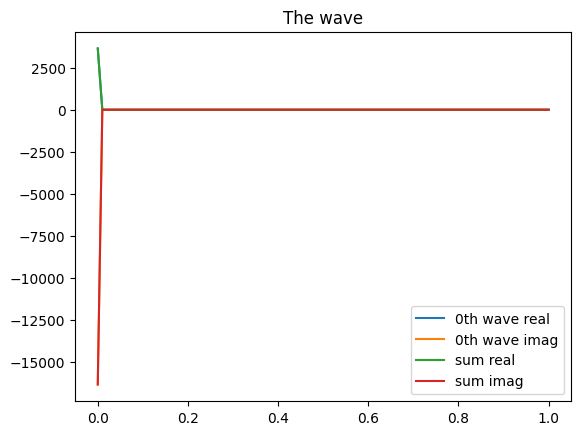

3648.242224698104 -16357.098373369363 0.0 0.0


In [43]:
import numpy as np 
import scipy 
import matplotlib.pyplot as plt 

from scipy.sparse.linalg import LinearOperator
from scipy.sparse.linalg import gmres

class gmres_counter(object):
    def __init__(self, disp=True):
        self._disp = disp
        self.niter = 0
    def __call__(self, rk=None):
        self.niter += 1
        if self._disp:
            print('iter %3i\trk = %s' % (self.niter, str(rk)))

def make_plane_wave_superposition(points, f, bc_type = None):
    if bc_type is None:
        bc_type = ([], [])

    N          = len(bc_type[0]) + 1
    
    def operator(x): 
        amplitudes = x.real
        momenta    = x.imag
        A          = np.zeros((2 * N), complex)
        for j in range(N): 
            A[2 * j    ] = np.sum(amplitudes * (1j * momenta)**j * np.exp(1j * momenta * points[0]))
            A[2 * j + 1] = np.sum(amplitudes * (1j * momenta)**j * np.exp(1j * momenta * points[1]))
        return A 

    b          = np.zeros(2 * N, dtype=complex) 
    b[0] = f[0]
    b[1] = f[1] 
    for j in range(1, N): 
        b[2 * j    ] = bc_type[0][j-1][1]
        b[2 * j + 1] = bc_type[1][j-1][1]


    A       = LinearOperator((2 * N, 2 * N), matvec =  operator)

    counter = gmres_counter()
    coeffs, exitCode = gmres(A,  b, tol=1e-15, callback=counter) 
    return coeffs, operator(coeffs), b

coeffs, Ax, b = make_plane_wave_superposition([0, 1], [1, 1+1j])
print(b, Ax)

def make_plane_wave(xx, coeffs):
    N = int(len(coeffs)/2)
    amplitudes = coeffs[  : N]
    momenta    = coeffs[N :  ]
    waves = []
    sum   = 0
    for i in range(N): 
        wave = amplitudes[i] * np.exp(1j * momenta[i] * xx)
        waves.append(wave)
        sum += wave
    return sum, waves 

print(coeffs)

xx          = np.linspace(0, 1, 100)
sum, waves  = make_plane_wave(xx, coeffs)
plt.title("The wave") 
for i, wave in enumerate(waves):
    plt.plot(xx, wave.real, label=f"{i}th wave real")
    plt.plot(xx, wave.imag, label=f"{i}th wave imag")

plt.plot(xx, sum.real, label=f"sum real")
plt.plot(xx, sum.imag, label=f"sum imag")
plt.legend()
plt.show()

print(sum[0].real, sum[0].imag, sum[-1].real, sum[-1].imag)

In [10]:
[1, 2][1:]

[2]

iter   1	rk = 0.9773974900042482
iter   2	rk = 0.9492823742609001
iter   3	rk = 0.9433268173221823
iter   4	rk = 0.7497208752280463
iter   5	rk = 0.18648140886593106
iter   6	rk = 1.4824536982762992e-14
iter   7	rk = 1.6701303469400088e-14
iter   8	rk = 1.554963567873876e-14
iter   9	rk = 1.4324298414754032e-14
iter  10	rk = 1.7303302712498793e-15
iter  11	rk = 1.4091155227830515e-15
iter  12	rk = 4.048504562956608e-17
iter  13	rk = 5.792485076539011e-15
iter  14	rk = 5.475056004422773e-15
iter  15	rk = 4.995668667025759e-15
iter  16	rk = 1.7236697221234807e-15
iter  17	rk = 8.728997617186541e-16
iter  18	rk = 2.8377951647331585e-17
iter  19	rk = 5.8024333264208135e-15
iter  20	rk = 4.164917425897004e-15
iter  21	rk = 4.017046488605141e-15
iter  22	rk = 1.5260068737232877e-15
iter  23	rk = 1.3963421236283884e-15
iter  24	rk = 8.819282241280357e-16
iter  25	rk = 6.558436228958843e-15
iter  26	rk = 6.5349245378519334e-15
iter  27	rk = 6.459895822798924e-15
iter  28	rk = 3.515541717867030

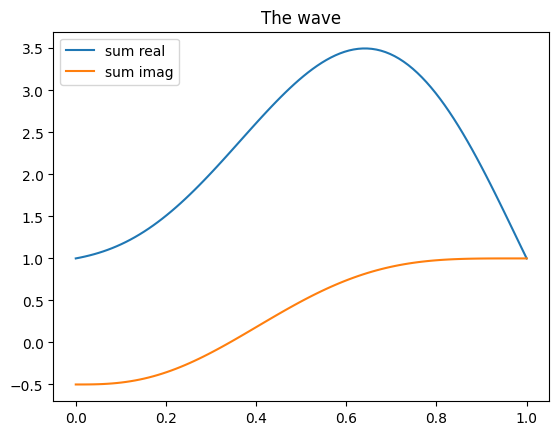

((0.9999999999999769-0.49999999999999645j),
 (1-0.5j),
 (0.9999999999999929+1.0000000000000195j),
 (1+1j))

In [33]:
import numpy as np 
import scipy 
import matplotlib.pyplot as plt 

from scipy.sparse.linalg import LinearOperator
from scipy.sparse.linalg import gmres

class gmres_counter(object):
    def __init__(self, disp=True):
        self._disp = disp
        self.niter = 0
    def __call__(self, rk=None):
        self.niter += 1
        if self._disp:
            print('iter %3i\trk = %s' % (self.niter, str(rk)))


class PlaneWave: 
    def __init__(self, amplitudes, momenta):
        self.amplitudes = amplitudes
        self.momenta = momenta
        self.omega   = self.momenta**2 / 2
        self.N       = len(amplitudes)
    
    def __call__(self, xx, derivative_order=0, t=0):
        waves = []
        sum   = 0
        for i in range(self.N): 
            wave = self.amplitudes[i] * (1j * self.momenta[i])**derivative_order * np.exp(1j * (self.momenta[i] * xx - self.omega[i] * t))
            waves.append(wave)
            sum += wave
        return sum
    
def make_plane_wave_superposition(points, f, k0, bc_type = None):
    if bc_type is None:
        bc_type = ([], [])

    N          = len(bc_type[0]) + 1

    #All plane waves with a maximum momentum of k0/2
    momenta    = k0 / (2 * N) * np.arange(-N, N)
    
    def operator(amplitudes): 
        A          = np.zeros((2 * N), complex)
        for j in range(N): 
            A[2 * j    ] = np.sum(amplitudes * (1j * momenta)**j * np.exp(1j * momenta * points[0]))
            A[2 * j + 1] = np.sum(amplitudes * (1j * momenta)**j * np.exp(1j * momenta * points[1]))
        return A 

    b    = np.zeros(2 * N, dtype=complex) 
    b[0] = f[0]
    b[1] = f[1] 
    for j in range(1, N): 
        b[2 * j    ] = bc_type[0][j-1][1]
        b[2 * j + 1] = bc_type[1][j-1][1]


    A       = LinearOperator((2 * N, 2 * N), matvec =  operator)

    counter = gmres_counter()
    coeffs, exitCode = gmres(A,  b, tol=1e-15, callback=counter) 


    return coeffs, operator(coeffs), b, momenta

amplitudes, Ax, b, momenta = make_plane_wave_superposition([0, 1], [1-0.5j, 1+1j], 2*np.pi, bc_type = ([(1, 1), (2, 10)], [(1, -11), (2, 10)]))

print("Mean deviation of solution: ", np.mean(Ax - b))


print(amplitudes)

xx          = np.linspace(0, 1, 100)
dx          = xx[1] - xx[0]
wave  = PlaneWave(amplitudes, momenta)
sum   = wave(xx) 
plt.title("The wave") 
plt.plot(xx, sum.real, label=f"sum real")
plt.plot(xx, sum.imag, label=f"sum imag")
plt.legend()
plt.show()

wave(0), 1-0.5j, wave(1), 1+1j

In [30]:
(- 2 * sum.real[-2] + sum.real[-1] + sum.real[-3])/dx**2

5.906437675666559